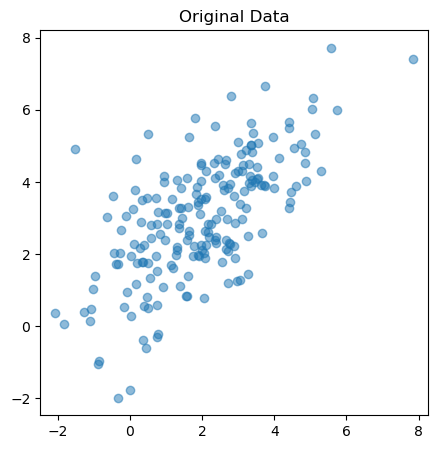

Explained Variance: [4.58783418]


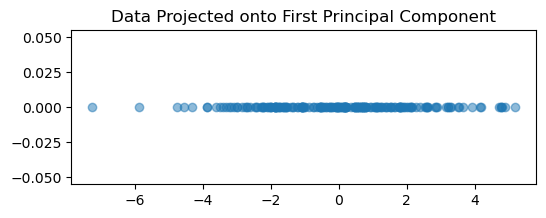

From-scratch PCA (first 5):
 [[ 1.09918826]
 [ 1.41024352]
 [-0.53334466]
 [ 3.50497893]
 [-1.07185665]]
Sklearn PCA      (first 5):
 [[-1.09918826]
 [-1.41024352]
 [ 0.53334466]
 [-3.50497893]
 [ 1.07185665]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA

# 1. Generate 2D synthetic data
def generate_2d_data(n_samples=200, random_state=42):
    np.random.seed(random_state)
    mean = [2, 3]
    cov = [[3, 2],[2, 3]]
    X = np.random.multivariate_normal(mean, cov, n_samples)
    return X

X = generate_2d_data()

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.title("Original Data")
plt.axis('equal')
plt.show()

# 2. PCA from scratch (Eigen method)
class PCA_scratch:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.mean_ = None
        self.components_ = None
        self.explained_variance_ = None
    
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
        
        # sort in descending order
        sort_idx = np.argsort(eigen_vals)[::-1]
        eigen_vals = eigen_vals[sort_idx]
        eigen_vecs = eigen_vecs[:, sort_idx]
        
        if self.n_components:
            eigen_vals = eigen_vals[:self.n_components]
            eigen_vecs = eigen_vecs[:, :self.n_components]
        
        self.explained_variance_ = eigen_vals
        self.components_ = eigen_vecs

    def transform(self, X):
        X_centered = X - self.mean_
        return X_centered @ self.components_
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

pca_model = PCA_scratch(n_components=1)
X_pca_1d = pca_model.fit_transform(X)

print("Explained Variance:", pca_model.explained_variance_)

# 3. Visualize 1D projection
plt.figure(figsize=(6,2))
plt.scatter(X_pca_1d[:,0], np.zeros_like(X_pca_1d[:,0]), alpha=0.5)
plt.title("Data Projected onto First Principal Component")
plt.show()

# 4. Compare with scikit-learn
pca_sklearn = sklearnPCA(n_components=1)
X_sklearn_1d = pca_sklearn.fit_transform(X)
print("From-scratch PCA (first 5):\n", X_pca_1d[:5])
print("Sklearn PCA      (first 5):\n", X_sklearn_1d[:5])